# Importing the Dependencies

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score

# Loading the DataFrame

In [23]:
df = pd.read_csv('creditcard.csv')

# Few rows of the dataset

In [24]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Checking for null values

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# dataset informations

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# HeatMap

<Axes: >

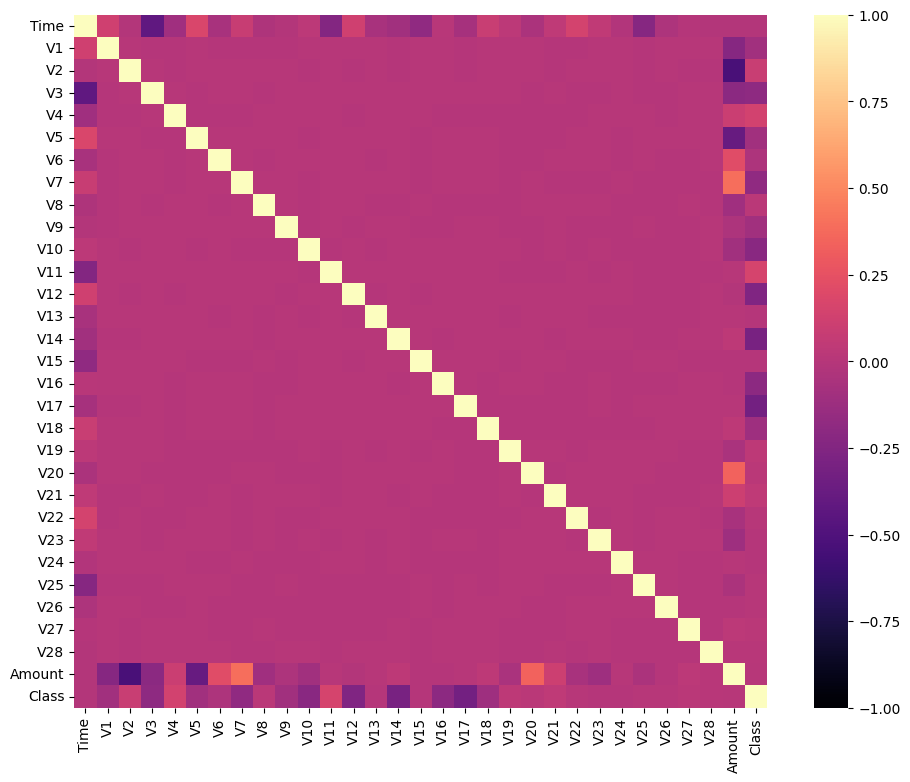

In [75]:
corrmat = df.corr()
plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='magma')

In [28]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Normal Vs Fraud

Text(0, 0.5, 'Frequency')

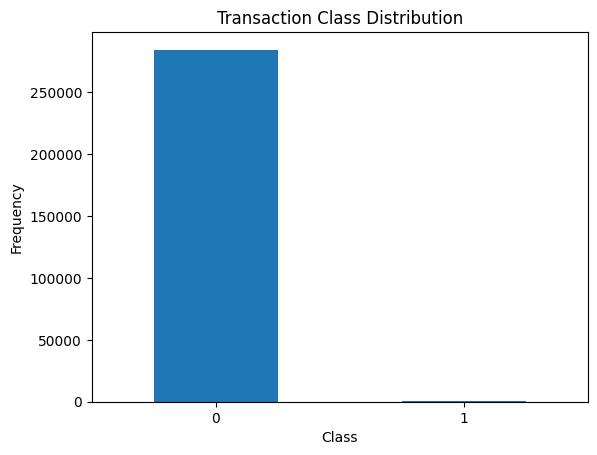

In [36]:
count_classes = pd.value_counts(df['Class'])

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Separating the data for analysis

In [37]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [38]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [39]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [40]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [41]:
normal_sample = df.sample(n=492)

In [42]:
new_df = pd.concat([normal_sample, fraud], axis=0)

In [45]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282742,171109.0,0.252397,1.350074,-0.280233,1.473084,1.044747,-1.388008,1.168418,-0.803121,-0.296786,...,0.167573,1.080131,-0.350407,0.228001,-0.678004,0.160372,-0.146617,-0.176557,1.00,0
111038,72068.0,-1.228587,2.006715,-0.147956,0.882977,0.319922,0.307893,-1.025018,-1.928061,-1.094129,...,-1.133350,0.745886,-0.110377,-0.452239,-0.412193,-0.305966,0.295101,0.222379,1.00,0
201642,133972.0,-0.144912,1.050829,-0.097991,-0.816699,0.776450,-0.633472,1.032190,-0.165006,0.095307,...,-0.325535,-0.644462,0.006432,-0.707854,-0.334669,0.189957,0.363718,0.147840,6.38,0
24266,33149.0,-0.548673,0.873060,1.387989,0.401913,0.575211,-0.166083,0.627003,0.004179,-0.500504,...,-0.137815,-0.398027,0.069839,-0.317080,-0.051237,-0.628710,-0.052045,0.024224,4.00,0
19,15.0,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,...,-0.177650,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [46]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

# Split the data into Training data & Testing Data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# ***Models***

# LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)

# Accuracy

In [68]:
r2 = r2_score(X_test_prediction, Y_test)
print('R2 score : ', r2)
cm = confusion_matrix(X_test_prediction, Y_test)
print('confusion matrix score : ', cm)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score : ', test_data_accuracy)

R2 score :  0.7124687239366139
confusion matrix score :  [[97 12]
 [ 2 86]]
Accuracy score :  0.9289340101522843


# Support Vector Classifier

In [65]:
sclassifier = SVC(kernel = 'linear', random_state = 0)
sclassifier.fit(X_train, Y_train)
X_test_prediction = sclassifier.predict(X_test)

# Accuracy

In [66]:
r2 = r2_score(X_test_prediction, Y_test)
print('R2 score : ', r2)
cm = confusion_matrix(X_test_prediction, Y_test)
print('confusion matrix score : ', cm)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score : ', test_data_accuracy)

R2 score :  0.6435717326521924
confusion matrix score :  [[99 17]
 [ 0 81]]
Accuracy score :  0.9137055837563451


# Decision tree

In [70]:
dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclassifier.fit(X_train, Y_train)
X_test_prediction = dclassifier.predict(X_test)

In [71]:
r2 = r2_score(X_test_prediction, Y_test)
print('R2 score : ', r2)
cm = confusion_matrix(X_test_prediction, Y_test)
print('confusion matrix score : ', cm)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score : ', test_data_accuracy)

R2 score :  0.532693894389439
confusion matrix score :  [[86 10]
 [13 88]]
Accuracy score :  0.883248730964467


# Random Forest Classifier

In [73]:
rclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, Y_train)
X_test_prediction = rclassifier.predict(X_test)

In [74]:
r2 = r2_score(X_test_prediction, Y_test)
print('R2 score : ', r2)
cm = confusion_matrix(X_test_prediction, Y_test)
print('confusion matrix score : ', cm)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score : ', test_data_accuracy)

R2 score :  0.6679308891698272
confusion matrix score :  [[98 15]
 [ 1 83]]
Accuracy score :  0.9187817258883249
